In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mnist_helper
%aimport mnist_helper

mnh = mnist_helper.MNIST_Helper(random_seed=42)

import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()


In [4]:
from sklearn.model_selection import cross_val_score

# Beyond accuracy for full MNIST

Conditional accuracy metrics
- have given us tools to
 *measure* weaknesses in our predictions
 
Beyond the summary measure on sub-classes (conditional accuracy)
- we can also examine individual examples for correctness

But to become a successful Data Scientist, you will need to take some *action* to correct the mis-predictions.

We roll up our sleeves and diagnose errors
- Perform a deep dive into the misclassified examples
- Determine if there is a systematic problem
- Propose model improvements
    - Feature Engineering: adding features to help the model identify classes more easily
    - Modify the Loss function
    
We will focus on diagnosis for now and leave potential improvements for you to experiment with.


Let's start by fitting the model and plotting the Confusion Matrix.

Retrieving MNIST_784 from cache
Normalized confusion matrix


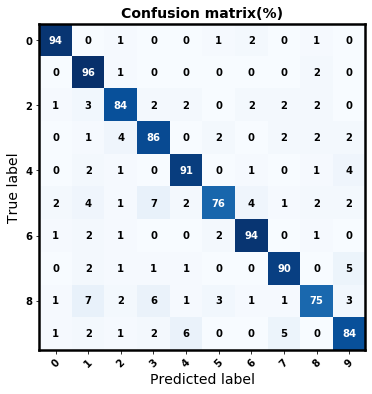

In [5]:
mnh = mnist_helper.MNIST_Helper(random_seed=42)
mnh.setup()
_= mnh.fit()

# Now predict the value of the digit on the second half:
fig, ax = plt.subplots(figsize=(12,6))
confusion_mat = mnh.create_confusion_matrix()

digits = range(0,10)
_= clh.plot_confusion_matrix(confusion_mat, digits, ax=ax, normalize=True)

As we have already observed
- We perform extremely well on images of the digits 0, 1, 6
- The biggest problem lies with images of the digits 5, 8
- But we do less well with other digits: 2, 3, 4, 9
    
Questions to ask yourself:
- Are the type and level of mis-prediction acceptable ?
- If not: can you come up with new features that reduce mis-prediction ?

What we have done above is to examine *Conditional Accuracy* (Recall) via the Confusion Matrix:
- Accuracy conditioned on examples with a particular target

Let's "zoom in" and examine mis-classified examples for a single digit $D \in \{ 0, 1, \ldots, 9 \}$
- If we see some commonality on these examples, we might propose a synthetic feature to compensate

We can achieve this with a little coding
- Remember: Jupyter allows use to inspect the code by typing `mnh.plot_problem_digits??` into a code cell

In [6]:
# Inspect the code by removing the leading "#" on the next line
# mnh.plot_problem_digits??

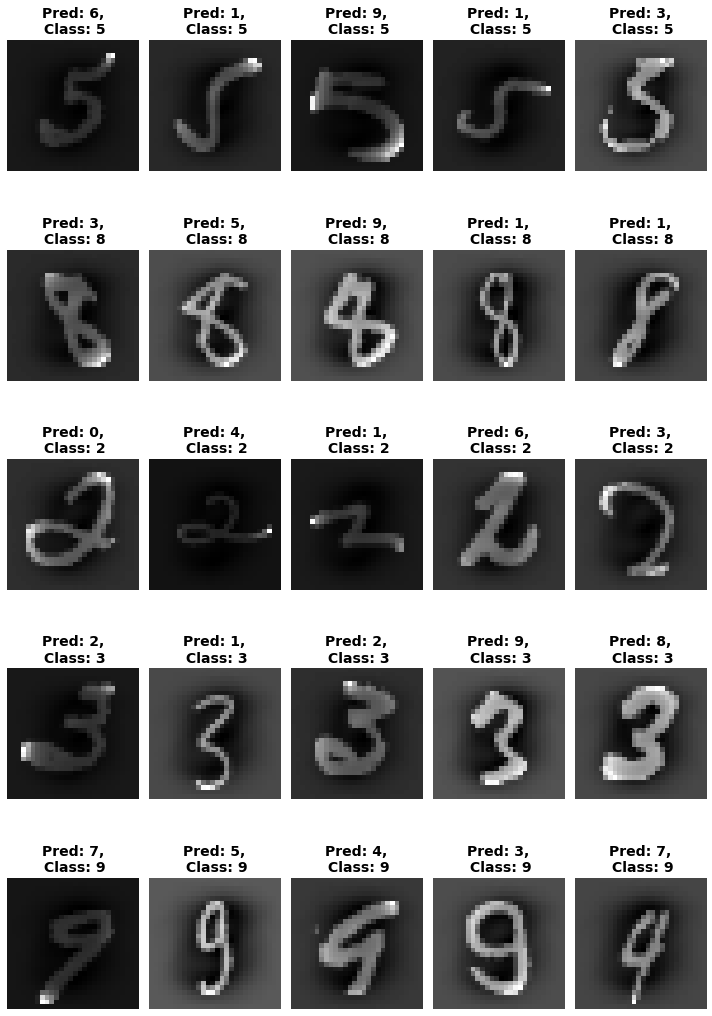

In [7]:
problem_digits = [ '5', '8', '2', '3', '9' ]

mnh.plot_problem_digits( problem_digits )

Each row
- corresponds to a single digit (in the set `problem_digits`)
- shows examples of that digit that have been mis-classified

Our hope is to 
- identify some common characteristic of the mis-classified examples
- propose a remedial action to increase the chances of correcting the predictions
    - feature engineering
    - pre-processing examples



The first row shows the misclassified 5's. 

Note the odd handful of really bright pixels
- is this a possible *cause* of the mis-classification
    - we don't truly know *how* the classifier makes its decision
    - without visualizing the "pattern" that the parameters $\Theta$ of the binary classifier are using

This warrants further investigation
- which we do not perform here
- if the theory is true
    - pre-processing to "smooth" intensities across neighbors may help


What about the misclassified 8's ? 
- Theory: Does the leftward tilt causes misclassification

We could purse this theory by examining metrics conditional on examples that are
- 8's with left tilt
- 8's with right tilt
- is there a measurable difference ?
    


There is another possibility for misclassification: 
- The examples with incorrect classification are low confidence predictions
    - probabilities barely above the threshold

Recall that our prediction is a vector of probabilities of length 10
- vector $\hat{\mathbf{p}}^\ip$ (of length 10) of probabilities of the image being each digit
- We choose as the single prediction the digit with highest probability
$$\hat{\y}^\ip = \argmax{c} \hat{\mathbf{p}}^\ip_c$$
- Is it possible that the probability of the incorrect class was barely above that of the correct class ?

Let's answer this question with some code.
- Remember: Jupyter allows use to inspect the code by typing `mnh.predict_with_probs??` into a code cell

In [8]:
# Inspect the code by removing the leading "#" on the next line
# mnh.predict_with_probs??

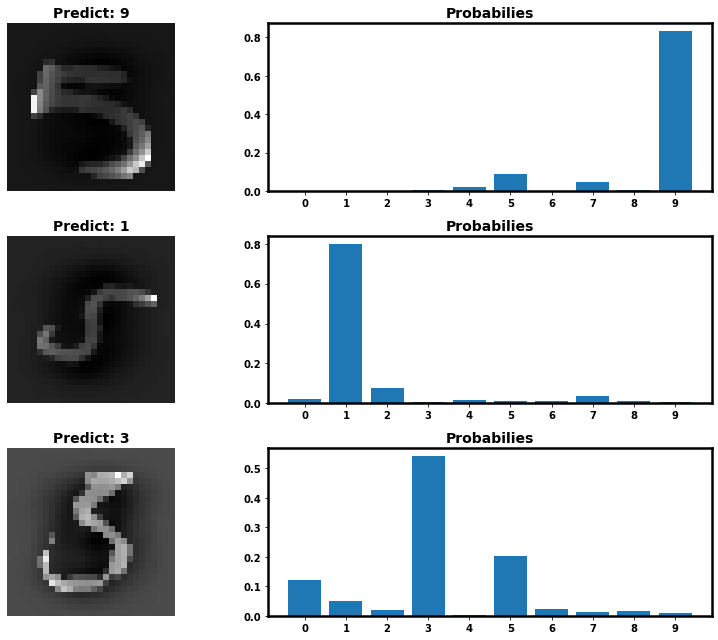

In [9]:
# Select some mis-classified "5"'s'
problems = mnh.misclassified["5"][ [2,3,4] ]
mnh.predict_with_probs(problems, digits)

Examining the probabilities, we refute the possibility
- The probability of the correct class (5) is *much* lower than several incorrect classes


Let's narrow our focus 
- to the true 8's
- that are mis-predicted as 1's


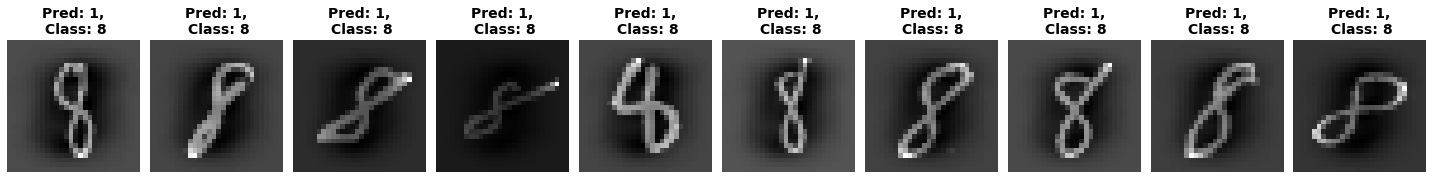

In [10]:
mnh.plot_problem_digits( ['8'], wrong_class='1', num_cols=10)

Theories:
- Are a couple of extremely bright pixels a possible cause for misclassification ?
- Is the "pattern" (i.e., parameters) for the digit "1" not specific enough ?
    - Many of the problematic "8"'s have strong vertical sub-images of bright pixels
    - Is that why they are predicted as "1" ?
    - Does the pattern for "1" need to emphasize (increase parameter value) which dark pixels must be dark ?

We leave it to you to explore these and alternative theories, along with possible fixes.

# Improving prediction

Suppose we identify a *small* sub-class of the true 8's
- which are mis-predicted
- but share a common characteristic
- that is *different* from the majority of examples that are truly 8's

For example: tilt in the "opposite" direction

What can we do to improve these mis-predictions ?

Perhaps the problem is that
- there are too few examples of the problematic sub-class
- such that the optimizer does not "focus" on getting these examples right

This is similar to the problem of *imbalanced data*
- the number of examples with Positive and Negative labels is very different

The solution to both 
- this mis-labeling of a "sub-class of class" (8's titled in "opposite" direction)
- the mis-labeling of the non-dominant class in an imbalanced dataset

is the same:
- increase the number of examples similar to the mis-labeled examples
- to cause the optimizer to focus more on this sub-class

This is called *data augmentation* and will be re-visited in the module on Imbalanced Data.


In [11]:
print("Done")

Done
